In [1258]:
import numpy as np
import os
from scipy import optimize
from scipy.io import loadmat
from matplotlib import pyplot

In [1259]:
# Read From File
file = open("input.txt" , "r")

# Line 1
line1 = file.readline().split()
IN = int(line1[0])
HN = int(line1[1])
ON = int(line1[2])
                   
# Line 2
line2 = file.readline()
m = int(line2)

X = np.zeros((m, IN))
y = np.zeros((m, ON))

# Remaining Lines (X , y)
lines = file.readlines()
idx = 0
for line in lines:
    line_splited = line.split()
    for i in range(IN):
        X[idx][i] = float(line_splited[i])
    for j in range(ON):
        y[idx][j] = float(line_splited[j+IN])
    idx += 1
    
file.close()

In [1260]:
def Normalization(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    n = X.shape[1]
    m = X.shape[0]

    for i in range(n):
        mu[i] = np.min(X_norm[: , i])
        sigma[i] = np.max(X_norm[: , i]) - np.min(X_norm[: , i])
    
    for i in range(m):
        for j in range(n):
            X_norm[i,j] = (X[i,j] - mu[j])/sigma[j]
    
    return X_norm
    
X = Normalization(X)
y = Normalization(y)

In [1261]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoidGradient(z):
    return sigmoid(z) * (1-sigmoid(z))

In [1262]:
def gradiantDescent(Theta1, Theta2, X, y, lambda_, num_itr):

    # Needed Varibles
    m, n = X.shape         # Number or Rows
    J = []                 # Cost function
    
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    for _ in range(num_itr):
        # Forward Propagation 
        hLayer = np.array(sigmoid(np.dot(X,Theta1.T)))
        oLayer = np.array(sigmoid(np.dot(hLayer,Theta2.T)))
        # Cost Function
        J.append(np.sum(((oLayer-y)*(oLayer-y)))/2)
        # Back Propagation
        segma2 = (oLayer - y) * sigmoidGradient(oLayer)
        segma1 = np.dot(segma2, Theta2) * sigmoidGradient(hLayer)

        Theta2 -= lambda_ * np.dot(segma2.T , hLayer)
        Theta1 -= lambda_ * np.dot(segma1.T , X)

    return Theta1, Theta2 , J


<img src="random_intialization.PNG">

In [1263]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = .8

    W = np.zeros((L_out,L_in))

    W = ( np.random.rand(L_out,L_in) * (2*epsilon_init) ) - epsilon_init

    return W
initial_Theta1 = randInitializeWeights(IN+1, HN)
initial_Theta2 = randInitializeWeights(HN, ON)

4.368995935965037
Theta1 :  [[-0.55406428 -0.25673614 -0.06874499 -0.14964321  0.17653524  0.4566561
  -1.0104266  -0.62377435 -0.15214871]
 [-0.89683129 -1.0383325  -0.54633693  0.30652718  0.74963524 -1.25099006
  -0.28365272 -0.87319668 -1.65844241]
 [-0.37871131 -1.2225577  -1.6336998  -0.19702352  0.87118753 -1.20112981
  -0.28177026 -0.76261535 -0.96358208]
 [-1.09324056 -1.87395533 -0.29029755 -1.07230224  0.05957141 -0.79938566
   0.07130197  0.51546188 -1.6507761 ]
 [-0.13786228 -0.68619181  0.28669101 -0.21499869 -0.1566356  -0.43120749
  -0.53157386 -1.05205326 -0.33134912]
 [-1.18713545 -0.98134167 -0.05913896 -0.24469998  0.5820146  -0.37292663
   0.11215858 -0.82005907 -0.48092793]
 [-0.65964368  1.59090171  0.95183452  0.32634691 -2.15709803  0.67099293
  -0.04733363 -1.33879038  2.61024182]
 [-1.1786414   0.12226963 -0.17674653 -0.48419162 -0.22056597 -0.29695048
   0.21820621 -0.54759296  0.17407123]
 [-0.91299784 -1.83376238 -1.42727157  0.02726717 -0.30644235 -0.3405

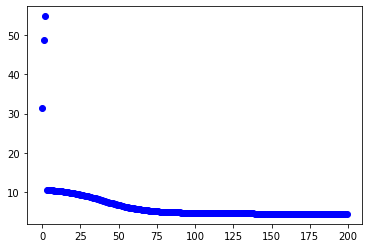

In [1267]:
# ============================= Training =============================
Theta1 = initial_Theta1.copy()  
Theta2 = initial_Theta2.copy()

lambda_ = .05
num_itrs = 200
Theta1, Theta2, J = gradiantDescent(Theta1, Theta2, X, y,lambda_,num_itrs)

pyplot.plot( range(len(J)) ,J,'bo')
print(J[len(J)-1])

print("Theta1 : " , Theta1)
print("Theta2 : " , Theta2)

In [1265]:
# Write To File
wFile = open("thetas.txt" , "w")

t1r , t1c = Theta1.shape
t2r , t2c = Theta2.shape

# Write theta 1
wFile.writelines(str(t1r)+" ")
wFile.writelines(str(t1c)+"\n")

for i in range(t1r):
    for j in range(t1c):
        wFile.write(str(Theta1[i][j])+" ")
wFile.write("\n")

# Write theta 2
wFile.writelines(str(t2r)+" ")
wFile.writelines(str(t2c)+"\n")

for i in range(t2r):
    for j in range(t2c):
        wFile.write(str(Theta2[i][j])+" ")
wFile.write("\n")

wFile.close()